In [26]:
# region Set up notebook imports
%load_ext autoreload
%autoreload
# Allow for imports of other scripts
import sys

PATH = "/data/MEAprojects/PropSignal"
if PATH not in sys.path:
    sys.path.append(PATH)
# Reload a module after changes have been made
from importlib import reload
# endregion

import numpy as np
from multiprocessing import Pool
from tqdm import tqdm
import matplotlib.pyplot as plt

from spikeinterface.extractors import NwbRecordingExtractor, BinaryRecordingExtractor
from spikeinterface.toolkit import get_noise_levels
from spikeinterface.toolkit.preprocessing import bandpass_filter, scale

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
%store -r chans_in_not_bad
chans_in_not_bad = [c - 769 for c in chans_in_not_bad]

In [29]:
SPIKE_AMP_THRESH = 5
FREQ_MIN = 300
FREQ_MAX = 3000

In [35]:
REC_BIN = BinaryRecordingExtractor(
    file_paths="/data/MEAprojects/buzsaki/SiegleJ/AllenInstitute_744912849/session_766640955/probe_773592320/spike_band.dat",
    sampling_frequency=30000.0,
    num_chan=384,
    dtype="int16",
    gain_to_uV=1,
    offset_to_uV=0.0
)
REC_BIN = scale(REC_BIN, 1.0, 0.0, dtype="float32")
REC_BIN = bandpass_filter(REC_BIN, freq_min=FREQ_MIN, freq_max=FREQ_MAX, dtype="float32")
REC_BIN = REC_BIN.channel_slice(chans_in_not_bad)

noises_bin = get_noise_levels(REC_BIN, return_scaled=False)

In [36]:
REC_NWB = NwbRecordingExtractor(
    "/data/MEAprojects/dandi/000034/sub-mouse412804/sub-mouse412804_ecephys.nwb"
)
REC_NWB = scale(REC_NWB, 1.0, 0.0, dtype="float32")
REC_NWB = bandpass_filter(REC_NWB, freq_min=FREQ_MIN, freq_max=FREQ_MAX, dtype="float32")

noises_nwb = get_noise_levels(REC_NWB, return_scaled=False)

In [21]:
# def get_channel_rms(chan_id):
#     traces = RECORDING.get_traces(return_scaled=False, channel_ids=[chan_id]).flatten()
#     rms = np.sqrt(np.mean(np.square(traces)))
#     return rms

# rmses = []
# with Pool(processes=20) as pool:
#     tasks = RECORDING.get_channel_ids()
#     for rns in tqdm(pool.imap(get_channel_rms, tasks, chunksize=len(tasks)//60), total=len(tasks)):
#         rmses.append(rms)

45.036755
13.992622


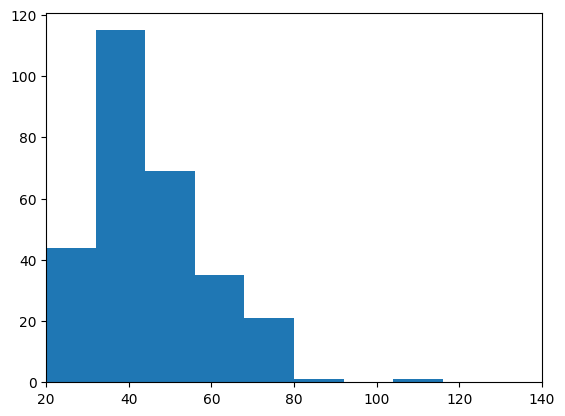

In [42]:
print(np.mean(noises_bin))
print(np.std(noises_bin))

plt.hist(noises_bin, range=(20, 140))
plt.xlim(20, 140)
plt.show()

42.39473
9.361135


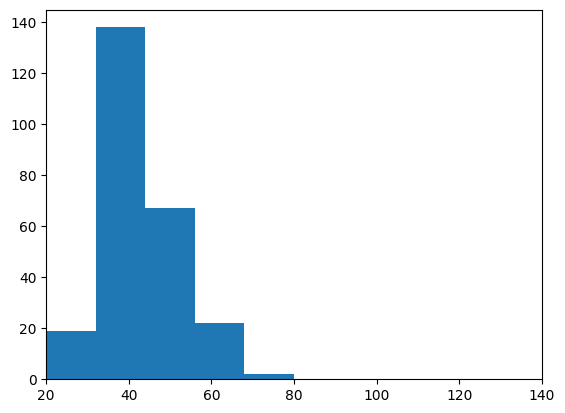

In [43]:
print(np.mean(noises_nwb))
print(np.std(noises_nwb))

plt.hist(noises_nwb, range=(20, 140))
plt.xlim(20, 140)
plt.show()

